## Damiso and Jamie version


# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline
%config Completer.use_jedi = False


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json




In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# Import API key
from api_keys import damiso

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# creating sample size for testing
sample_size = 1500

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=sample_size)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=sample_size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

In [6]:
print(cities)

['punta arenas', 'kangaba', 'kodiak', 'guilin', 'zhezkazgan', 'atuona', 'marystown', 'kaitangata', 'rikitea', 'seoul', 'torbay', 'tevaitoa', 'san quintin', 'faya', 'tuatapere', 'kalmunai', 'sitka', 'saldanha', 'cape town', 'sokoni', 'mount gambier', 'karaton', 'ushuaia', 'balkanabat', 'puri', 'kadykchan', 'makat', 'broome', 'busselton', 'belushya guba', 'pemangkat', 'hermanus', 'upernavik', 'albany', 'vaini', 'pacific grove', 'vila', 'bengkulu', 'beaverlodge', 'puerto escondido', 'tuktoyaktuk', 'touros', 'georgetown', 'cabedelo', 'ploemeur', 'dwarka', 'kamenka', 'narrabri', 'sumbawa', 'katsuura', 'pokrovsk', 'wenling', 'ponta do sol', 'port alfred', 'livingston', 'te anau', 'iqaluit', 'newton', 'labuan', 'thompson', 'ayan', 'puerto ayora', 'hvolsvollur', 'north bend', 'hobart', 'laguna', 'mataura', 'lar', 'oban', 'sao filipe', 'maragogi', 'east london', 'acapulco', 'vardo', 'kiama', 'samarai', 'nanortalik', 'nikolskoye', 'olafsvik', 'cockburn town', 'hasaki', 'vostok', 'kitimat', 'mafi

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# url does not have the city
url = f"http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID={damiso}&q="


In [8]:
# Delete later...this is a test
# test_url = url + "richmond"
# test_url

In [9]:
# set up lists to hold reponse info
city_list = []
city_counter = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(f'Getting request {city_counter} for {city}')
    try:
        
        response = requests.get(url + city).json()
        # print(response)

        # getting latitude
        city_lat = response['coord']['lat']

        #getting longitude
        city_long = response['coord']['lon']

        #getting temp. max
        city_temp_max = response['main']['temp_max']

        #getting city humidity
        city_humidity = response['main']['humidity']

        #getting city
        city_cloudiness = response['clouds']['all']

        #getting city windspeed
        city_windspeed = response ['wind']['speed']

        #getting description
        description_test = response ['weather'][0]['description']
        
        #getting country
        country = response ['sys']['country']



        # create dictionary of city data
        city_list.append({
            "City": city,
            "Lat": city_lat,
            "Long": city_long,
            "Temp. Max": city_temp_max,
            "Humidity": city_humidity,
            "Cloudiness": city_cloudiness,
            "Windspeed": city_windspeed,
            "description": description_test,
            "Country": country
        })
        city_counter += 1
    except:
        print("city not found")
        city_counter += 1
        
print("Reached the end of city list")        

Getting request 1 for punta arenas
Getting request 2 for kangaba
Getting request 3 for kodiak
Getting request 4 for guilin
Getting request 5 for zhezkazgan
Getting request 6 for atuona
Getting request 7 for marystown
Getting request 8 for kaitangata
Getting request 9 for rikitea
Getting request 10 for seoul
Getting request 11 for torbay
Getting request 12 for tevaitoa
Getting request 13 for san quintin
Getting request 14 for faya
Getting request 15 for tuatapere
Getting request 16 for kalmunai
Getting request 17 for sitka
Getting request 18 for saldanha
Getting request 19 for cape town
Getting request 20 for sokoni
Getting request 21 for mount gambier
Getting request 22 for karaton
Getting request 23 for ushuaia
Getting request 24 for balkanabat
Getting request 25 for puri
Getting request 26 for kadykchan
city not found
Getting request 27 for makat
Getting request 28 for broome
Getting request 29 for busselton
Getting request 30 for belushya guba
city not found
Getting request 31 for p

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# creating a data frame
city_data_df = pd.DataFrame(city_list)
city_data_df

,City,Lat,Long,Temp. Max,Humidity,Cloudiness,Windspeed,description,Country
0,punta arenas,-53.1500,-70.9167,32.00,69,75,8.05,broken clouds,CL
1,kangaba,11.9333,-8.4167,91.90,41,80,3.22,broken clouds,ML
2,kodiak,57.7900,-152.4072,39.20,87,90,14.97,light rain,US
3,guilin,25.2819,110.2864,80.60,78,75,8.95,broken clouds,CN
4,zhezkazgan,47.8043,67.7144,73.40,11,100,10.38,overcast clouds,KZ
...,...,...,...,...,...,...,...,...,...
555,asfi,32.2994,-9.2372,64.80,56,99,14.47,overcast clouds,MA
556,oga,46.4631,10.3470,51.01,38,0,5.75,clear sky,IT
557,nador,35.1740,-2.9287,62.60,82,75,10.36,broken clouds,MA
558,amazar,53.8580,120.8750,41.90,92,100,18.25,moderate rain,RU


In [11]:
# test
# city_data_df.loc[2,"Humidity"] = 105
# city_data_df

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
city_data_df['Humidity'] > 100

0      False
1      False
2      False
3      False
4      False
       ...  
555    False
556    False
557    False
558    False
559    False
Name: Humidity, Length: 560, dtype: bool

In [13]:
#  Get the indices of cities that have humidity over 100%.

cities_over_100 = city_data_df[(city_data_df['Humidity'] > 100)].index

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = city_data_df.drop(cities_over_100)
clean_city_data_df

,City,Lat,Long,Temp. Max,Humidity,Cloudiness,Windspeed,description,Country
0,punta arenas,-53.1500,-70.9167,32.00,69,75,8.05,broken clouds,CL
1,kangaba,11.9333,-8.4167,91.90,41,80,3.22,broken clouds,ML
2,kodiak,57.7900,-152.4072,39.20,87,90,14.97,light rain,US
3,guilin,25.2819,110.2864,80.60,78,75,8.95,broken clouds,CN
4,zhezkazgan,47.8043,67.7144,73.40,11,100,10.38,overcast clouds,KZ
...,...,...,...,...,...,...,...,...,...
555,asfi,32.2994,-9.2372,64.80,56,99,14.47,overcast clouds,MA
556,oga,46.4631,10.3470,51.01,38,0,5.75,clear sky,IT
557,nador,35.1740,-2.9287,62.60,82,75,10.36,broken clouds,MA
558,amazar,53.8580,120.8750,41.90,92,100,18.25,moderate rain,RU


In [15]:
# Saving CSV file to output for vacay 
clean_city_data_df.to_csv('../output_data/cities.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

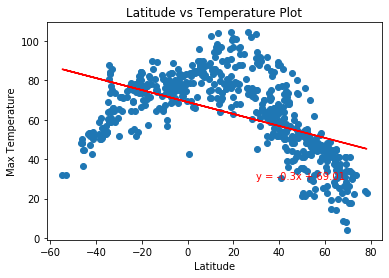

In [16]:
# identify x, y variables
x_values = clean_city_data_df['Lat']
x_values

y_values = clean_city_data_df['Temp. Max']
y_values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

# add regression line
plt.plot(x_values,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(30,30),fontsize=10,color="red")

plt.title('Latitude vs Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

plt.savefig('../output_data/lat_vs_temp.png')

plt.show()

## Latitude vs. Humidity Plot

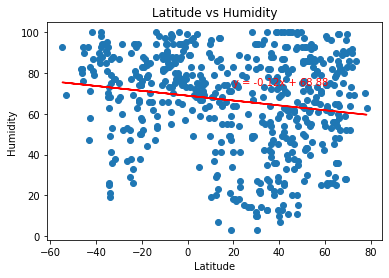

In [17]:
# identify x, y variables
x_values = clean_city_data_df['Lat']
x_values

y_values_humidity = clean_city_data_df['Humidity']
y_values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values_humidity)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values_humidity)

# add regression line
plt.plot(x_values,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(20,74),fontsize=10,color="red")

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

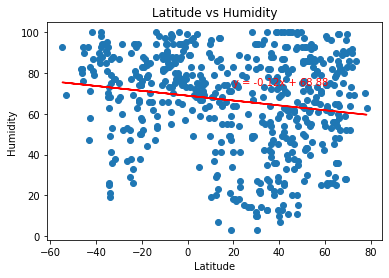

In [18]:
# identify x, y variables
x_values = clean_city_data_df['Lat']
x_values

y_values_humidity = clean_city_data_df['Humidity']
y_values_humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values_humidity)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values_humidity)

# add regression line
plt.plot(x_values,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(20,74),fontsize=10,color="red")

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Wind Speed Plot

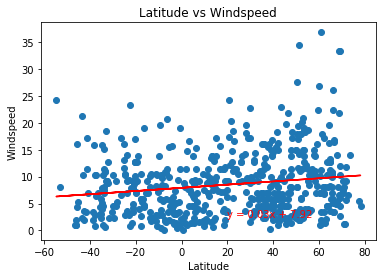

In [19]:
# identify x, y variables
x_values = clean_city_data_df['Lat']
x_values

y_values_windspeed = clean_city_data_df['Windspeed']
y_values_windspeed

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values_windspeed)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values_windspeed)

# add regression line
plt.plot(x_values,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(20,2.5),fontsize=10,color="red")

plt.title('Latitude vs Windspeed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()

## Linear Regression

### create northern and southern data frames


In [20]:
northern_df = clean_city_data_df.loc[(clean_city_data_df['Lat'] >= 0)]
northern_df

,City,Lat,Long,Temp. Max,Humidity,Cloudiness,Windspeed,description,Country
1,kangaba,11.9333,-8.4167,91.90,41,80,3.22,broken clouds,ML
2,kodiak,57.7900,-152.4072,39.20,87,90,14.97,light rain,US
3,guilin,25.2819,110.2864,80.60,78,75,8.95,broken clouds,CN
4,zhezkazgan,47.8043,67.7144,73.40,11,100,10.38,overcast clouds,KZ
6,marystown,47.1666,-55.1483,40.84,92,100,9.86,overcast clouds,CA
...,...,...,...,...,...,...,...,...,...
555,asfi,32.2994,-9.2372,64.80,56,99,14.47,overcast clouds,MA
556,oga,46.4631,10.3470,51.01,38,0,5.75,clear sky,IT
557,nador,35.1740,-2.9287,62.60,82,75,10.36,broken clouds,MA
558,amazar,53.8580,120.8750,41.90,92,100,18.25,moderate rain,RU


In [21]:
southern_df = clean_city_data_df.loc[(clean_city_data_df['Lat'] < 0)]
southern_df


,City,Lat,Long,Temp. Max,Humidity,Cloudiness,Windspeed,description,Country
0,punta arenas,-53.1500,-70.9167,32.00,69,75,8.05,broken clouds,CL
5,atuona,-9.8000,-139.0333,80.38,76,95,13.89,overcast clouds,PF
7,kaitangata,-46.2817,169.8464,50.00,80,0,1.99,clear sky,NZ
8,rikitea,-23.1203,-134.9692,78.30,81,78,9.44,broken clouds,PF
11,tevaitoa,-16.7833,-151.5000,82.02,66,87,5.84,overcast clouds,PF
...,...,...,...,...,...,...,...,...,...
542,sao felix do xingu,-6.6447,-51.9950,69.03,98,27,1.48,scattered clouds,BR
543,katherine,-14.4667,132.2667,80.60,47,40,6.91,scattered clouds,AU
544,grand gaube,-20.0064,57.6608,84.00,76,16,7.00,few clouds,MU
546,mulchen,-37.7167,-72.2333,50.61,98,100,0.76,light rain,CL


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

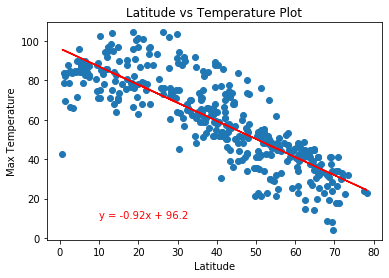

In [27]:
# identify x, y variables
x_values_northern = northern_df['Lat']
x_values_northern

y_values_northern_temp = northern_df['Temp. Max']
y_values_northern_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern,y_values_northern_temp)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_northern, y_values_northern_temp)

# add regression line
plt.plot(x_values_northern,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(10,10),fontsize=10,color="red")

plt.title('Latitude vs Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

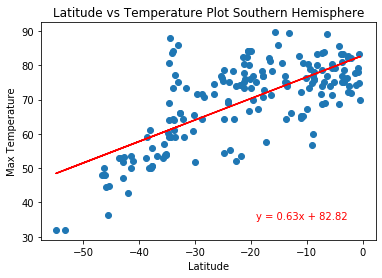

In [28]:
# identify x, y variables
x_values_southern = southern_df['Lat']
x_values_southern

y_values_southern_temp = southern_df['Temp. Max']
y_values_southern_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern,y_values_southern_temp)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_southern, y_values_southern_temp)

# add regression line
plt.plot(x_values_southern,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(-19,35),fontsize=10,color="red")

plt.title('Latitude vs Temperature Plot Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

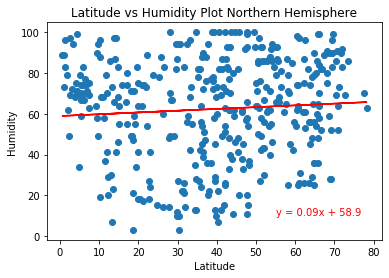

In [29]:
# identify x, y variables
x_values_northern = northern_df['Lat']
x_values_northern

y_values_northern_humidity = northern_df['Humidity']
y_values_northern_humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern,y_values_northern_humidity)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_northern, y_values_northern_humidity)

# add regression line
plt.plot(x_values_northern,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(55,10),fontsize=10,color="red")

plt.title('Latitude vs Humidity Plot Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [25]:
# identify x, y variables
x_values_southern = southern_df['Lat']
x_values_southern

y_values_southern_humidity = southern_df['Humidity']
y_values_southern_humidity

0      69
5      76
7      80
8      81
11     66
       ..
542    98
543    47
544    76
546    98
549    88
Name: Humidity, Length: 177, dtype: int64

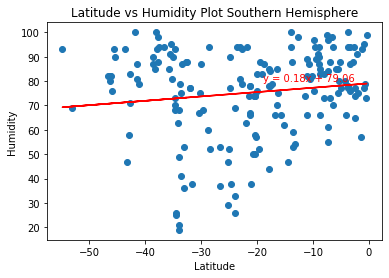

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern,y_values_southern_humidity)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_southern, y_values_southern_humidity)

# add regression line
plt.plot(x_values_southern,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(-19,80),fontsize=10,color="red")

plt.title('Latitude vs Humidity Plot Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

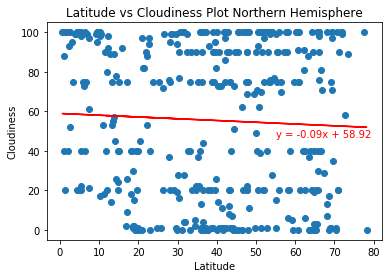

In [34]:
# identify x, y variables
x_values_northern = northern_df['Lat']
x_values_northern

y_values_northern_cloudiness = northern_df['Cloudiness']
y_values_northern_humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern,y_values_northern_cloudiness)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_northern, y_values_northern_cloudiness)

# add regression line
plt.plot(x_values_northern,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(55,47),fontsize=10,color="red")

plt.title('Latitude vs Cloudiness Plot Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

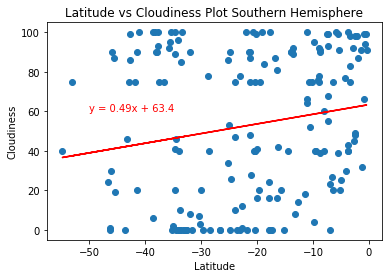

In [39]:
# identify x, y variables
x_values_southern = southern_df['Lat']
x_values_southern

y_values_southern_cloudiness = southern_df['Cloudiness']
y_values_southern_cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern,y_values_southern_cloudiness)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_southern, y_values_southern_cloudiness)

# add regression line
plt.plot(x_values_southern,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(-50,60),fontsize=10,color="red")

plt.title('Latitude vs Cloudiness Plot Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

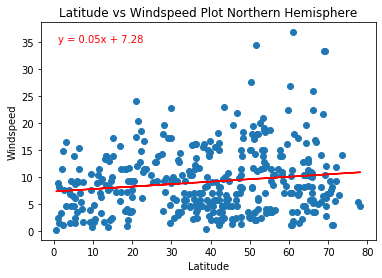

In [37]:
# identify x, y variables
x_values_northern = northern_df['Lat']
x_values_northern

y_values_northern_windspeed = northern_df['Windspeed']
y_values_northern_humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern,y_values_northern_windspeed)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_northern, y_values_northern_windspeed)

# add regression line
plt.plot(x_values_northern,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(1,35),fontsize=10,color="red")

plt.title('Latitude vs Windspeed Plot Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

,City,Lat,Long,Temp. Max,Humidity,Cloudiness,Windspeed,description,Country
0,punta arenas,-53.15,-70.9167,32.0,69,75,8.05,broken clouds,CL


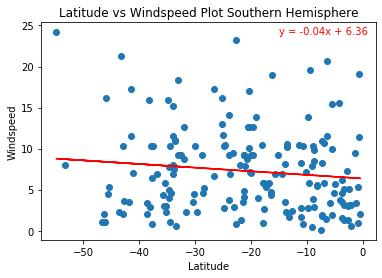

In [44]:
# identify x, y variables
x_values_southern = southern_df['Lat']
x_values_southern

y_values_southern_windspeed = southern_df['Windspeed']
y_values_southern_windspeed

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern,y_values_southern_windspeed)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_southern, y_values_southern_windspeed)

# add regression line
plt.plot(x_values_southern,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(-15,24),fontsize=10,color="red")

plt.title('Latitude vs Windspeed Plot Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()